In [1]:
import os
os.chdir("../")
print(os.getcwd())

/data1/xhuan192/codes/med-vlrm


In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pformat

In [3]:
train_path = "data/raw/PMC-VQA/train.csv"
train_df = pd.read_csv(train_path, dtype=str, keep_default_na=False)

train_2_path = "data/raw/PMC-VQA/train_2.csv"
train_2_df = pd.read_csv(train_2_path, dtype=str, keep_default_na=False)

test_clean_path = "data/raw/PMC-VQA/test_clean.csv"
test_clean_df = pd.read_csv(test_clean_path, dtype=str, keep_default_na=False)

In [4]:
print(f"Sample from train_df:\n{pformat(train_df.iloc[0].to_dict())}")
print(f"Sample from train_2_df:\n{pformat(train_2_df.iloc[0].to_dict())}")
print(f"Sample from test_clean_df:\n{pformat(test_clean_df.iloc[0].to_dict())}")

Sample from train_df:
{'Answer': 'Focal uptake pattern',
 'Answer_label': 'B',
 'Choice A': ' A:Diffuse uptake pattern ',
 'Choice B': ' B:Focal uptake pattern ',
 'Choice C': ' C:No uptake pattern ',
 'Choice D': ' D:Cannot determine from the information given ',
 'Figure_path': 'PMC1064097_F1.jpg',
 'Question': 'What is the uptake pattern in the breast? '}
Sample from train_2_df:
{'Answer': 'B',
 'Caption': 'A slightly altered cell . (c-c‴) A highly altered cell as seen '
            'from 4 different angles . Note mitochondria/mitochondrial '
            'networks (green), Golgi complexes (red), cell nuclei (light blue) '
            'and the cell outline (yellow).',
 'Choice A': ' A: Green ',
 'Choice B': ' B: Red ',
 'Choice C': ' C: Light blue ',
 'Choice D': ' D: Yellow',
 'Figure_path': 'PMC8253797_Fig4_11.jpg',
 'Question': ' What color is used to label the Golgi complexes in the image?',
 'index': '35',
 'split': 'train'}
Sample from test_clean_df:
{'Answer': 'Magnetic resona

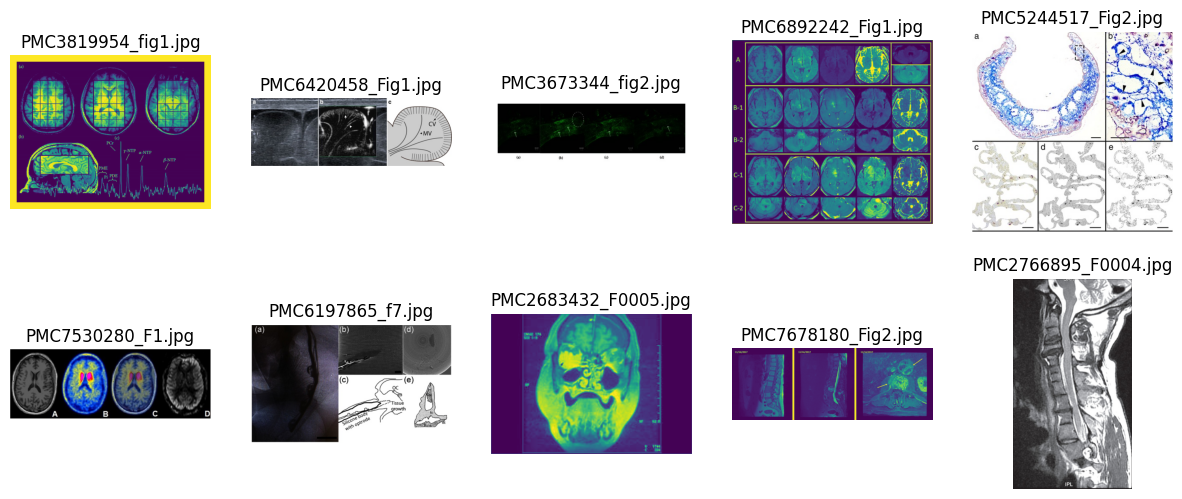

In [5]:
# visualize random 10 images in "Figure_path"
train_img_dir = Path("data/PMC-VQA/images/images")
train_img_paths = train_df["Figure_path"].sample(10, random_state=42)
train_img_paths = [train_img_dir / img_path for img_path in train_img_paths]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, img_path in zip(axes.flatten(), train_img_paths):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(img_path.name)

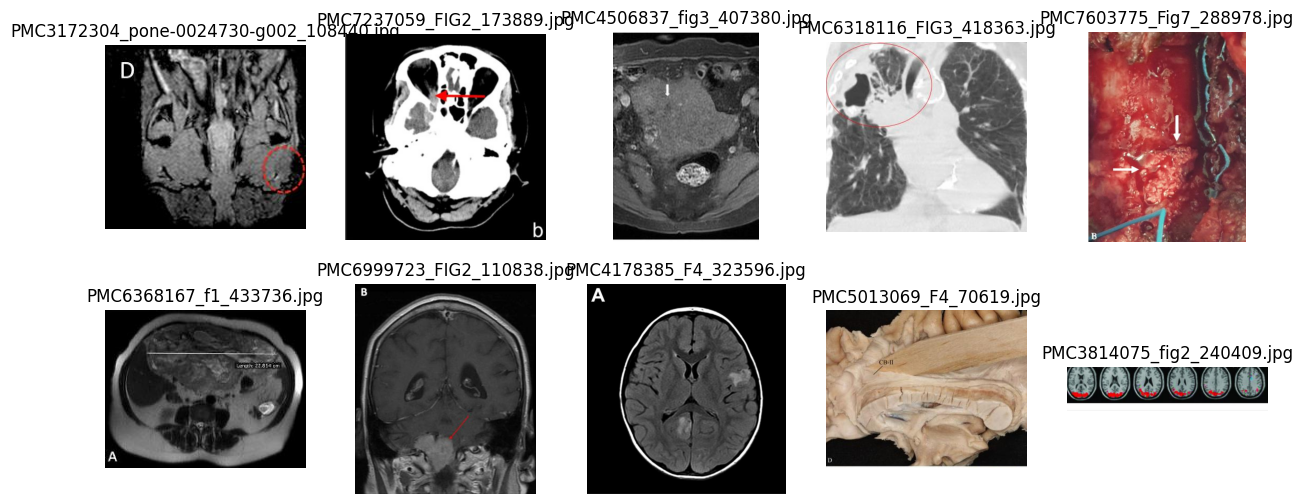

In [6]:
# visualize random 10 images in "Figure_path"
train_2_img_dir = Path("data/PMC-VQA/images_2/figures")
train_2_img_paths = train_2_df["Figure_path"].sample(10, random_state=42)
train_2_img_paths = [train_2_img_dir / img_path for img_path in train_2_img_paths]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, img_path in zip(axes.flatten(), train_2_img_paths):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(img_path.name)

In [7]:
def get_all_image_suffix(df, column_name):
    """
    Get all unique image suffixes from the specified column in the DataFrame.
    """
    return df[column_name].apply(lambda x: Path(x).suffix).unique()

# Get all unique image suffixes from the "Figure_path" column in both DataFrames
train_suffixes = get_all_image_suffix(train_df, "Figure_path")
train_2_suffixes = get_all_image_suffix(train_2_df, "Figure_path")
test_clean_suffixes = get_all_image_suffix(test_clean_df, "Figure_path")
print(f"train_df image suffixes: {train_suffixes}")
print(f"train_2_df image suffixes: {train_2_suffixes}")
print(f"test_clean_df image suffixes: {test_clean_suffixes}")

train_df image suffixes: ['.jpg']
train_2_df image suffixes: ['.jpg']
test_clean_df image suffixes: ['.jpg']


In [8]:
problem_idx = 507
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': "'One patient",
 'Answer_label': "'",
 'Choice A': " 'A:One patient ",
 'Choice B': ' B:Two patients ',
 'Choice C': ' C:Three patients ',
 'Choice D': " D:Four patients ' ",
 'Figure_path': 'PMC1421418_F5.jpg',
 'Question': 'How many patients are represented in the 3D FEM models shown in '
             'Figures 3 and 4? '}


In [9]:
problem_idx = 1706
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': 'N/A',
 'Answer_label': 'A',
 'Choice A': ' A: N/A ',
 'Choice B': ' B: Large filling defect in the left atrium ',
 'Choice C': ' C: Blocked coronary arteries ',
 'Choice D': ' D: None of the above. ',
 'Figure_path': 'PMC1976316_F1.jpg',
 'Question': ' What is the result of the CT scan? '}


In [10]:
problem_idx = 4652
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': "Solitary level expression of signal S '",
 'Answer_label': 'D',
 'Choice A': ' A: Wild-Type cells ',
 'Choice B': ' B: SN cells ',
 'Choice C': ' C: SB cells expressing signal S ',
 'Choice D': " D: Solitary level expression of signal S ' ",
 'Figure_path': 'PMC2660287_F5.jpg',
 'Question': 'What does the (+) in the figure represent? '}


In [11]:
problem_idx = 34584
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': 'Non-enhanced area',
 'Answer_label': 'A',
 'Choice A': ' A:Non-enhanced area ',
 'Choice B': ' C:Axillary tumor ',
 'Choice C': ' D:Normal breast tissue ',
 'Choice D': ' D:Benign mass ',
 'Figure_path': 'PMC3844328_F3.jpg',
 'Question': 'What does the circle in the image indicate? '}


In [12]:
problem_idx = 19862
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': 'The photomicrograph does not provide enough information to '
           'determine the type of tumor.',
 'Answer_label': 'A',
 'Choice A': ' A:\xa0The photomicrograph does not provide enough information '
             'to determine the type of tumor. ',
 'Choice B': ' B:\xa0Adenocarcinoma ',
 'Choice C': ' C:\xa0Squamous cell carcinoma ',
 'Choice D': ' D:\xa0Benign neoplasm ',
 'Figure_path': 'PMC3350287_fig3.jpg',
 'Question': ' Which type of tumor is the photomicrograph showing? '}


In [13]:
problem_idx = 55172
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': '" Focal pattern DFO retinopathy',
 'Answer_label': '"',
 'Choice A': ' "A: Focal pattern DFO retinopathy ',
 'Choice B': ' B: Central serous retinopathy ',
 'Choice C': ' C: Branch retinal vein occlusion ',
 'Choice D': ' D: Central retinal artery occlusion" ',
 'Figure_path': 'PMC4475708_fig4.jpg',
 'Question': ' "What type of retinopathy is shown in the image?" '}


In [14]:
problem_idx = 78238
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': 'Nucleus of Myocardium',
 'Answer_label': 'C',
 'Choice A': ' A: Nucleus of pericardium ',
 'Choice B': ' C: Nucleus of Myocardium   ',
 'Choice C': ' C: Nucleus of endocardium  ',
 'Choice D': ' D: Nucleus of epicardium ',
 'Figure_path': 'PMC5133774_ijms-17-01746-f005.jpg',
 'Question': ' What does the red arrow indicate in the image C? '}


In [15]:
problem_idx = 148495
print(pformat(train_df.iloc[problem_idx].to_dict()))

{'Answer': 'T: thyroid gland,  common carotid artery, V: internal jugular '
           'vein.',
 'Answer_label': 'C',
 'Choice A': ' A: T: testes, A: adrenal gland, V: inferior vena cava. ',
 'Choice B': ' B: T: trachea, A: common carotid artery, V: internal jugular '
             'vein. ',
 'Choice C': ' C: T: thyroid gland, A: common carotid artery, V: internal '
             'jugular vein. ',
 'Choice D': ' D: T: thymus gland, A: common hepatic artery, V: superior '
             'mesenteric vein. ',
 'Figure_path': 'PMC7337579_F1.jpg',
 'Question': 'What do T, A, and V represent in the given image? '}
